<a href="https://colab.research.google.com/github/afeef2003/task-6/blob/main/task_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install and import libraries
!pip install pandas matplotlib seaborn scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import files

In [ ]:
print("Upload your Amazon stock CSV file:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Upload your Amazon stock CSV file:


Saving AMZN_stock_data.csv to AMZN_stock_data.csv


In [ ]:
# Step 3: Load the data
df = pd.read_csv(filename)
print("Data loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Data loaded successfully!
Dataset shape: (6987, 8)

First 5 rows:
                        Date      Open      High       Low     Close  \
0  1997-05-15 00:00:00-04:00  0.121875  0.125000  0.096354  0.097917   
1  1997-05-16 00:00:00-04:00  0.098438  0.098958  0.085417  0.086458   
2  1997-05-19 00:00:00-04:00  0.088021  0.088542  0.081250  0.085417   
3  1997-05-20 00:00:00-04:00  0.086458  0.087500  0.081771  0.081771   
4  1997-05-21 00:00:00-04:00  0.081771  0.082292  0.068750  0.071354   

       Volume  Dividends  Stock Splits  
0  1443120000        0.0           0.0  
1   294000000        0.0           0.0  
2   122136000        0.0           0.0  
3   109344000        0.0           0.0  
4   377064000        0.0           0.0  


In [ ]:
# Step 4: Basic data info
print("\nColumn names:")
print(df.columns.tolist())
print("\nBasic statistics:")
print(df.describe())


Column names:
['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

Basic statistics:
              Open         High          Low        Close        Volume  \
count  6987.000000  6987.000000  6987.000000  6987.000000  6.987000e+03   
mean     40.692696    41.165619    40.178290    40.685061  1.360552e+08   
std      58.144182    58.787641    57.435304    58.125169  1.375735e+08   
min       0.070313     0.072396     0.065625     0.069792  9.744000e+06   
25%       2.100250     2.148250     2.064250     2.110000  6.298900e+07   
50%       9.041500     9.158500     8.925000     9.021000  1.005360e+08   
75%      72.789249    73.643497    71.504250    73.006500  1.555070e+08   
max     239.020004   242.520004   238.029999   242.059998  2.086584e+09   

       Dividends  Stock Splits  
count     6987.0   6987.000000  
mean         0.0      0.003864  
std          0.0      0.244286  
min          0.0      0.000000  
25%          0.0      0.000000  
50%         

In [ ]:
# Step 5: Calculate daily returns
# Assuming you have a 'Close' price column (adjust if different)
price_column = 'Close'  # Change this if your price column has a different name

if price_column in df.columns:
    df['Daily_Return'] = df[price_column].pct_change()
    print(f"\nDaily returns calculated using {price_column} column")
else:
    print(f"Column '{price_column}' not found. Available columns: {df.columns.tolist()}")
    # Try common alternatives
    for col in ['close', 'Close Price', 'Adj Close']:
        if col in df.columns:
            price_column = col
            df['Daily_Return'] = df[price_column].pct_change()
            print(f"Using {col} column instead")
            break


Daily returns calculated using Close column


In [ ]:
# Step 6: Basic statistics on returns
returns = df['Daily_Return'].dropna()
print(f"\nReturn Statistics:")
print(f"Average daily return: {returns.mean():.4f} ({returns.mean()*100:.2f}%)")
print(f"Standard deviation: {returns.std():.4f}")
print(f"Best day: {returns.max()*100:.2f}%")
print(f"Worst day: {returns.min()*100:.2f}%")


Return Statistics:
Average daily return: 0.0017 (0.17%)
Standard deviation: 0.0352
Best day: 34.47%
Worst day: -24.77%


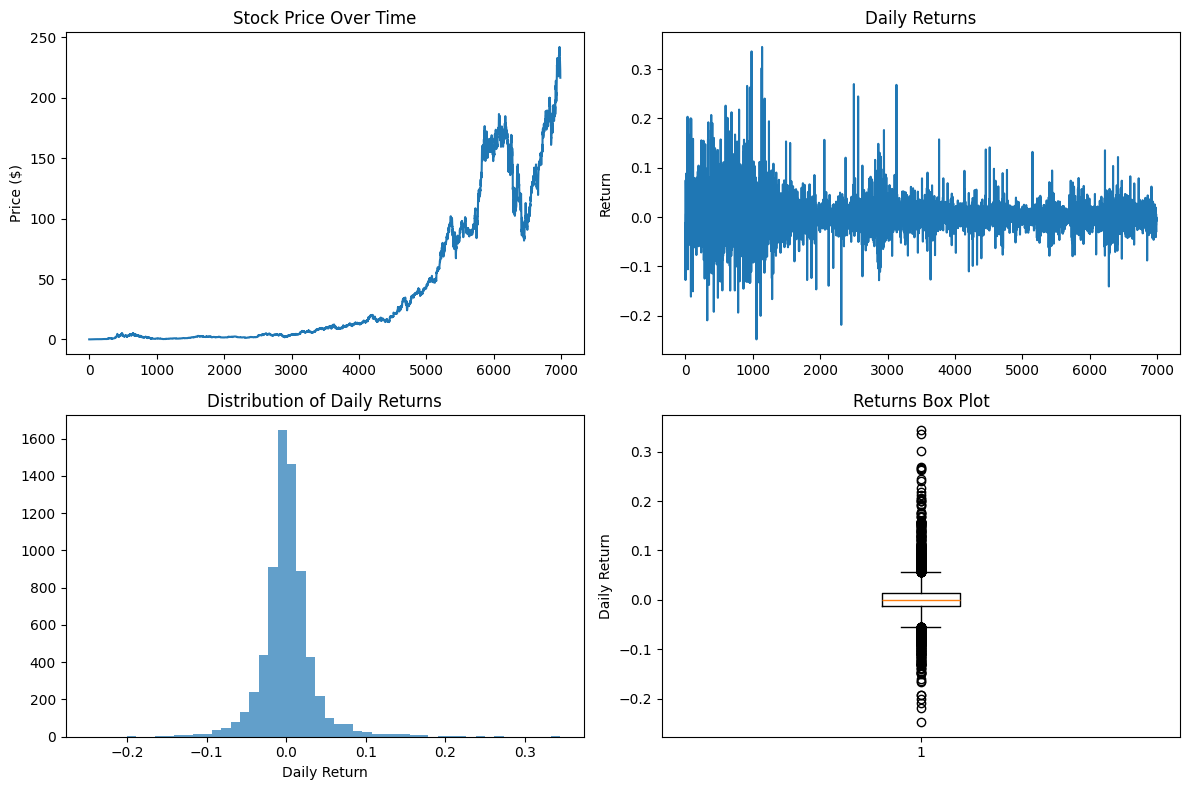

In [ ]:
# Step 7: Simple visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Stock price over time
axes[0,0].plot(df[price_column])
axes[0,0].set_title('Stock Price Over Time')
axes[0,0].set_ylabel('Price ($)')

# Daily returns
axes[0,1].plot(df['Daily_Return'])
axes[0,1].set_title('Daily Returns')
axes[0,1].set_ylabel('Return')

# Return distribution
axes[1,0].hist(returns, bins=50, alpha=0.7)
axes[1,0].set_title('Distribution of Daily Returns')
axes[1,0].set_xlabel('Daily Return')

# Box plot of returns
axes[1,1].boxplot(returns)
axes[1,1].set_title('Returns Box Plot')
axes[1,1].set_ylabel('Daily Return')

plt.tight_layout()
plt.show()

In [ ]:
# Step 8: Hypothesis Testing

print("\n" + "="*50)
print("HYPOTHESIS TESTING")
print("="*50)


HYPOTHESIS TESTING


In [ ]:
# Test 1: Are returns normally distributed?
print("\n1. Testing if returns are normally distributed:")
stat, p_value = stats.jarque_bera(returns)
print(f"Test statistic: {stat:.4f}")
print(f"P-value: {p_value:.6f}")
if p_value < 0.05:
    print("Result: Returns are NOT normally distributed")
else:
    print("Result: Returns appear to be normally distributed")


1. Testing if returns are normally distributed:
Test statistic: 38484.0203
P-value: 0.000000
Result: Returns are NOT normally distributed


In [ ]:
# Test 2: Is the average return significantly different from zero?
print("\n2. Testing if average return is different from zero:")
t_stat, p_value = stats.ttest_1samp(returns, 0)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")
if p_value < 0.05:
    print("Result: Average return is significantly different from zero")
else:
    print("Result: Average return is not significantly different from zero")


2. Testing if average return is different from zero:
T-statistic: 4.0635
P-value: 0.000049
Result: Average return is significantly different from zero


In [ ]:
# Test 3: Are returns positive on average?
print("\n3. Testing if returns are positive on average:")
t_stat, p_value = stats.ttest_1samp(returns, 0, alternative='greater')
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")
if p_value < 0.05:
    print("Result: Returns are significantly positive")
else:
    print("Result: Returns are not significantly positive")


3. Testing if returns are positive on average:
T-statistic: 4.0635
P-value: 0.000024
Result: Returns are significantly positive


In [ ]:
# Step 9: Correlation Analysis
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)


CORRELATION ANALYSIS


In [ ]:
# Get numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

In [ ]:
# Show correlation matrix
print("Correlation matrix:")
print(correlation_matrix.round(3))

Correlation matrix:
               Open   High    Low  Close  Volume  Dividends  Stock Splits  \
Open          1.000  1.000  1.000  1.000  -0.312        NaN         0.014   
High          1.000  1.000  1.000  1.000  -0.311        NaN         0.015   
Low           1.000  1.000  1.000  1.000  -0.313        NaN         0.014   
Close         1.000  1.000  1.000  1.000  -0.312        NaN         0.014   
Volume       -0.312 -0.311 -0.313 -0.312   1.000        NaN         0.016   
Dividends       NaN    NaN    NaN    NaN     NaN        NaN           NaN   
Stock Splits  0.014  0.015  0.014  0.014   0.016        NaN         1.000   
Daily_Return -0.015 -0.013 -0.012 -0.010   0.160        NaN         0.009   

              Daily_Return  
Open                -0.015  
High                -0.013  
Low                 -0.012  
Close               -0.010  
Volume               0.160  
Dividends              NaN  
Stock Splits         0.009  
Daily_Return         1.000  


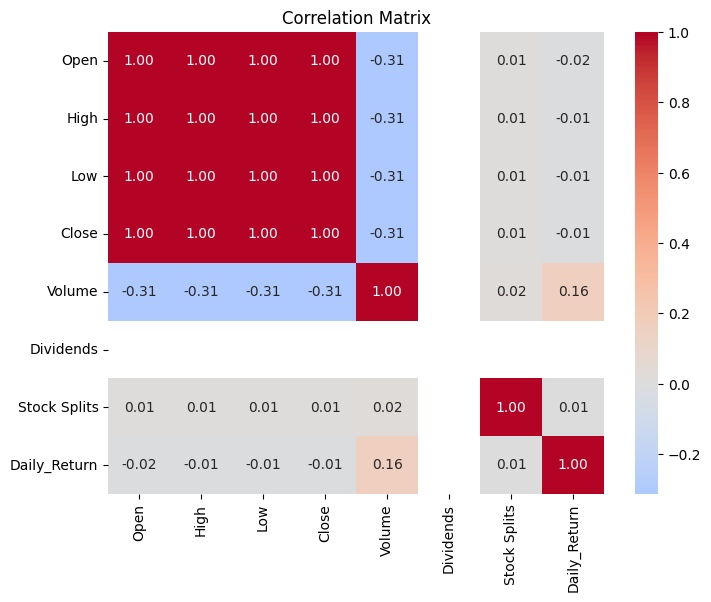

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Step 10: Summary
print("\n" + "="*50)
print("SUMMARY")
print("="*50)

print(f"Dataset contains {len(df)} trading days")
print(f"Average daily return: {returns.mean()*100:.2f}%")
print(f"Annual return estimate: {returns.mean()*252*100:.2f}%")
print(f"Daily volatility: {returns.std()*100:.2f}%")
print(f"Annual volatility estimate: {returns.std()*np.sqrt(252)*100:.2f}%")
print(f"Positive return days: {(returns > 0).sum()} out of {len(returns)} ({(returns > 0).mean()*100:.1f}%)")


SUMMARY
Dataset contains 6987 trading days
Average daily return: 0.17%
Annual return estimate: 43.09%
Daily volatility: 3.52%
Annual volatility estimate: 55.84%
Positive return days: 3557 out of 6986 (50.9%)


In [ ]:
# Risk measure
var_95 = np.percentile(returns, 5)
print(f"Value at Risk (95%): {var_95*100:.2f}% (expected loss on worst 5% of days)")

print("\nAnalysis complete!")

Value at Risk (95%): -4.76% (expected loss on worst 5% of days)

Analysis complete!
